# 都知事選(2020-07-05)、小池百合子氏にどの党派が入れたか

ベイズで計算するために以下を定義します．

- 今回の都知事選のX氏の得票率（確率）を$P(X氏)$とする．
- 都内で選挙権のある人がY党派である割合（確率）を$P(Y派)$とする
- 都内でY党派のうちX氏に投票した割合（確率）を$P(X氏|Y派)$とする．
- **X氏の得票率のうちY派である割合（確率）を$P(Y派|X氏)$とする．**（今回求めるもの）

ベイズの式は

\begin{eqnarray}
P(Y派|X氏) 
&=& \frac{P(X氏,Y派)P(Y派)}{P(X氏)}\\
&=& \frac{P(X氏|Y派)P(Y派)}{P(X氏)}
\end{eqnarray}

※ここで$P(X氏,Y派)$は都内の選挙権がある人中でX氏に投票してかつY党派である割合（確率）

例えば，小池氏の得票率のうち自民派である割合（確率）は以下の式で求められる．

\begin{eqnarray}
P(自民|小池) 
&=& \frac{P(小池,自民)}{P(小池)} \\
&=& \frac{P(小池|自民)P(自民)}{P(小池)}
\end{eqnarray}



この計算にあたって特に必要なデータは

- 都内で選挙権のある人がY党派である割合
- 都内でY党派のうちX氏に投票した割合

になる．が，正確なデータはないので以下の仮定をおく．

- 都内で選挙権のある人がY党派である割合$P(Y派)$
≒全国の政党支持率（つまり，都内の政党支持率と全国区の政党支持率がほぼ等しい）
- 都内でY党派のうちX氏に投票した割合$P(X氏|Y派)$≒都内でY党派のうちX氏に投票する予定の割合
（東京新聞が投票予定先を調査していたのでこれを使う．）


## データ

### NHKによる政党支持率

全国の政党支持率データとしてNHKの最新のものを利用する．

- [archive](https://web.archive.org/web/20200706075456/http://www.nhk.or.jp/senkyo/shijiritsu/)

> 調査概要：
- 調査期間	6月19日(金)～21日(日)
- 調査方法	電話法（固定・携帯ＲＤＤ）
- 調査相手	全国18歳以上　2,202人
- 回答数(率)	1,270人（57.7%）

![](NHK政党支持率_20200619-0621.PNG)

整形処理として，"支持なし"と"わからない、無回答"をまとまめて「無党派」とする．
また，東京新聞の投票予定先データと合わせるために"日本維新の会","社民","N国"をまとめてその他にまとめる．

表にまとめ直すと以下になる．

|政党名|支持率[%]|
|:---:|:------:|
|自民党|32.5|
|公明党|4.3|
|立憲民主党|5.6|
|国民民主党|0.6|
|共産|1.7|
|れいわ|0.6|
|その他|5.1|
|無党派|49.6|


In [14]:
32.5 + 4.3 + 5.6 + 0.6 + 1.7 + 0.6 + 5.1 + 49.6

100.0

### 投票予定先（東京新聞）

- https://www.tokyo-np.co.jp/article/38679
- https://web.archive.org/save/https://www.tokyo-np.co.jp/article/38679

>【調査の方法】6月26~28日､都内の有権者を対象にｺﾝﾋﾟｭｰﾀｰで無作為に選んだ番号に電話をかける方法で行い､実際に有権者がいる家庭につながった1457件のうち1030人から回答を得た｡各設問の回答の比率は小数点以下第2位で四捨五入しており､総計が100%にならない場合がある｡

![](https://static.tokyo-np.co.jp/image/article/size1/2/c/7/c/2c7c445f55c25759062e4f0cbae68c8e_1.jpg)


$$
P(小池|自民) = 73.4[\%] \\
P(山本|自民) = 3.1[\%] \\
P(宇都宮|自民) = 1.9[\%]\\
P(小野|自民) = 4.5[\%]\\
P(立花|自民) = 0.1[\%]\\
P(その他|自民) = 17[\%] \\
$$

$$
P(小池|公明) = 87.3[\%] \\
P(山本|公明) = 0[\%]  \\
P(宇都宮|公明) = 0[\%] \\
P(小野|公明) = 0[\%] \\
P(立花|公明) = 0[\%] \\
P(その他|公明) = 12.7[\%] \\
$$



In [13]:
73.4 + 3.1 + 1.9 + 4.5 + 0.1 + 17

100.0

## 小池都知事に入った割合

https://www.asahi.com/senkyo/tochijisen/2020/kaihyo/


$$
P(小池|自民) = 73.4[\%] \\
P(自民) = 32.5[\%]\\
P(小池) = 59.70[\%]
$$



$$
P(自民|小池) = \frac{P(小池,自民)}{P(小池)} 
= \frac{P(小池|自民)P(自民)}{P(小池)}
= \frac{0.734 \cdot 0.325}{0.5970}
= 39.96[\%]
$$

$$
P(公明|小池) 
= \frac{P(小池|公明)P(公明)}{P(小池)}
= \frac{0.873 \cdot 0.043}{0.5970}
= 6.29[\%]
$$

$$
P(無党派|小池)
= \frac{P(小池|無党派)P(無党派)}{P(小池)}
= \frac{0.601 \cdot 0.496}{0.5970}
= 49.93[\%]
$$

$$
P(立憲民主|小池)
= \frac{P(小池|立憲民主)P(立憲民主)}{P(小池)}
= \frac{0.561 \cdot 0.056}{0.5970}
= 5.26[\%]
$$

$$
P(国民民主|小池)
= \frac{P(小池|国民民主)P(国民民主)}{P(小池)}
= \frac{0.629 \cdot 0.006}{0.5970}
= 0.63[\%]
$$

$$
P(共産|小池)
= \frac{P(小池|共産)P(共産)}{P(小池)}
= \frac{0.214 \cdot 0.017}{0.5972}
= 0.61[\%]
$$

$$
P(れいわ|小池)
= \frac{P(小池|れいわ)P(れいわ)}{P(小池)}
= \frac{0.075 \cdot 0.006}{0.5972}
= 0.08[\%]
$$

5位で四捨五入


In [23]:
P_touha = {
    "自民": 0.325,
    "公明": 0.043,
    "立憲民主": 0.056,
    "国民民主": 0.006,
    "共産": 0.017,
    "れいわ": 0.006,
    "その他": 0.051,
    "無党派": 0.496,
}

In [28]:
# P(小池|Y党派)
P_koike_touha = {
    "自民": 0.734,
    "公明": 0.873,
    "立憲民主": 0.561,
    "国民民主": 0.629,
    "共産": 0.214,
    "れいわ": 0.075,
    "無党派": 0.601,
    "その他": 0,
}
P_koike_touha

{'自民': 0.734,
 '公明': 0.873,
 '立憲民主': 0.561,
 '国民民主': 0.629,
 '共産': 0.214,
 'れいわ': 0.075,
 '無党派': 0.601,
 'その他': 0}

In [29]:
P_tokuhyou_koike = 0.5970 
{k: P_koike_touha[k]*P_touha[k]/P_tokuhyou_koike for k in P_touha.keys()}

{'自民': 0.3995812395309883,
 '公明': 0.06287939698492462,
 '立憲民主': 0.052623115577889464,
 '国民民主': 0.006321608040201005,
 '共産': 0.006093802345058627,
 'れいわ': 0.0007537688442211055,
 'その他': 0.0,
 '無党派': 0.499323283082077}

In [32]:
# 100になるか
sum([P_koike_touha[k]*P_touha[k]/P_tokuhyou_koike for k in P_touha.keys()])

1.0275762144053602

池都知事に入れた党派の割合を表にまとめる．

|P(Y派\|小池)| 割合[%] |
|:-:|:-:|
|P(無党派\|小池)|49.93|
|P(自民\|小池)|39.96|
|P(公明\|小池)|6.29|
|P(立憲民主\|小池)|5.26|
|P(国民民主\|小池)|0.63|
|P(共産\|小池)|0.61|
|P(れいわ\|小池)|0.08|
|計|102.76|

※今回は正確なP(X氏|Y派)とP(Y派)を使ってないので，
実際の得票率P(X氏)で正規化してもぴったり100にならない．

In [15]:
49.93+39.96+6.29+5.26+0.63+0.61+0.08

102.76

In [3]:
# 自民|小池
0.734 * 0.325 / 0.5970

0.3995812395309883

In [4]:
# 公明|小池
0.873 * 0.043 / 0.5970

0.06287939698492462

In [5]:
# 無党派|小池
0.601 * 0.496 / 0.5970

0.499323283082077

In [6]:
# 立憲民主|小池
0.561 * 0.056 / 0.5970

0.052623115577889464

In [7]:
# 国民民主|小池
0.629 * 0.006 / 0.5970

0.006321608040201005

In [8]:
# 共産|小池
0.214 * 0.017 / 0.5970

0.006093802345058627

In [9]:
# れいわ|小池
0.075 * 0.006 / 0.5970

0.0007537688442211055

計100にならないので無党派を1とする比でみる.

|P(Y派\|小池)| 比 |
|:-:|:-:|
|$P(無党派|小池)$|1|
|$P(自民|小池)$|0.800|
|$P(公明|小池)$|0.126|
|$P(立憲民主|小池)$|0.105|
|$P(国民民主|小池)$|0.0126|
|$P(共産|小池)$|0.0122|
|$P(れいわ|小池)$|0.0016|


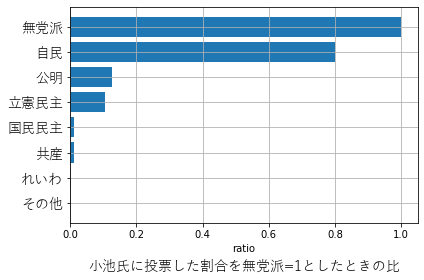

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'C:\WINDOWS\Fonts\YuGothR.ttc', size=14)

P_touha_koike = {k: P_koike_touha[k]*P_touha[k] /
                 P_tokuhyou_koike for k in P_touha.keys()}
koike_ratio = {}
for k in P_touha_koike.keys():
    koike_ratio[k] = P_touha_koike[k]/P_touha_koike["無党派"]
koike_ratio

# print(list(koike_ratio.keys()))
# print(list(koike_ratio.values()))
sorted_idx = np.argsort(list(koike_ratio.values()))
# print(sorted_idx)
plt.barh(y=np.array(list(koike_ratio.keys()))[sorted_idx], 
         width=np.array(list(koike_ratio.values()))[sorted_idx])

plt.yticks(fontproperties=fp)
plt.xlabel("ratio")
plt.title("小池氏に投票した割合を無党派=1としたときの比", fontproperties=fp, y=-0.25)
plt.grid(True)
plt.tight_layout()
plt.savefig("小池氏に投票した割合を無党派=1としたときの比.png")
plt.show()

## ベイズによる小池氏の得票率の推定

今回は，X氏に投票したかつY党派である同時確率の周辺化により
小池氏の得票率を前もってベイズ推定できた．

式にすると

\begin{eqnarray}
P(X氏) 
&=& \sum_{i=1}^{N} P(X氏, Y_{i}派)\\
&=& \sum_{i=1}^{N} P(X氏|Y_{i}派)P(Y_{i}派)
\end{eqnarray}

- ※$N$を全党派の数とする（今回は7）．
- ※なお，"日本維新の会"，"社民"，"N国"，"その他の党派"の方々が誰に投票予定かのデータはないので$P(X氏|その他の党派)=0$としているに等しい．


例えば，小池百合子氏の得票率をベイズ推定すると，

\begin{eqnarray}
P(小池) 
&=& \sum_{i=1}^{N} P(小池|Y派)P(Y派)\\
&=& P(小池|自民)P(自民)+P(小池|公明)P(公明)+P(小池|立民)P(立民)+P(小池|国民)P(国民)+P(小池|共産)P(共産)+P(小池|れいわ)P(れいわ)+P(小池|無党派)P(無党派)\\
&=& 61.3 [\%]
\end{eqnarray}

In [33]:
# 推定
sum([P_koike_touha[k]*P_touha[k] for k in P_touha.keys()])

0.613463

## 宇都宮氏の割合

$$
P(Y派|宇都宮) = \frac{P(宇都宮|Y派)P(Y派)}{P(宇都宮)}
$$


|政党名|支持率[%]|
|:---:|:------:|
|自民党|32.5|
|公明党|4.3|
|立憲民主党|5.6|
|国民民主党|0.6|
|共産|1.7|
|れいわ|0.6|
|その他|5.1|
|無党派|49.6|

In [5]:
P_touha, sum([P_touha[k] for k in P_touha.keys()])

({'自民': 0.325,
  '公明': 0.043,
  '立憲民主': 0.056,
  '国民民主': 0.006,
  '共産': 0.017,
  'れいわ': 0.006,
  'その他': 0.051,
  '無党派': 0.496},
 1.0)

In [10]:
# P(宇都宮|Y派)
P_utsunomiya_touha = {
    "自民": 0.019,
    "公明": 0,
    "立憲民主": 0.222,
    "国民民主": 0,
    "共産": 0.59,
    "れいわ": 0,
    "無党派": 0.084,
    "その他": 0,
}
P_tokuhyou_utsunomiya = 0.1376
{k: P_utsunomiya_touha[k]*P_touha[k]/P_tokuhyou_utsunomiya for k in P_touha.keys()}

{'自民': 0.04487645348837209,
 '公明': 0.0,
 '立憲民主': 0.09034883720930233,
 '国民民主': 0.0,
 '共産': 0.07289244186046512,
 'れいわ': 0.0,
 'その他': 0.0,
 '無党派': 0.30279069767441863}

誤差は0となっている公明・国民民主・れいわ・その他分であると考えられる．
（つまりデータが足りない．）

In [15]:
# 推定値
sum([P_utsunomiya_touha[k]*P_touha[k] for k in P_touha.keys()])

0.070301

## 山本太郎の割合

In [16]:
# P(山本|Y派)
P_yamamoto_touha = {
    "自民": 0.031,
    "公明": 0,
    "立憲民主": 0.104,
    "国民民主": 0.19,
    "共産": 0.045,
    "れいわ": 0.623,
    "無党派": 0.060,
    "その他": 0,
}
P_tokuhyou_yamamoto = 0.1072
{k: P_yamamoto_touha[k]*P_touha[k]/P_tokuhyou_yamamoto for k in P_touha.keys()}

{'自民': 0.09398320895522388,
 '公明': 0.0,
 '立憲民主': 0.05432835820895522,
 '国民民主': 0.010634328358208954,
 '共産': 0.007136194029850746,
 'れいわ': 0.03486940298507463,
 'その他': 0.0,
 '無党派': 0.27761194029850744}

In [20]:
sum([P_yamamoto_touha[k]*P_touha[k] for k in P_touha.keys()])

0.051302

## 小野泰輔の割合

In [21]:
# P(小野|Y派)
P_ono_touha = {
    "自民": 0.045,
    "公明": 0,
    "立憲民主": 0.039,
    "国民民主": 0,
    "共産": 0,
    "れいわ": 0,
    "無党派": 0.041,
    "その他": 0,
}
P_tokuhyou_ono = 0.0999
{k: P_ono_touha[k]*P_touha[k]/P_tokuhyou_ono for k in P_touha.keys()}

{'自民': 0.14639639639639637,
 '公明': 0.0,
 '立憲民主': 0.021861861861861863,
 '国民民主': 0.0,
 '共産': 0.0,
 'れいわ': 0.0,
 'その他': 0.0,
 '無党派': 0.20356356356356356}

In [22]:
sum([P_ono_touha[k]*P_touha[k] for k in P_touha.keys()])

0.037145